# Logistic Regression Implementation with Polynomial Features
## This is a continuation of a previous notebook 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

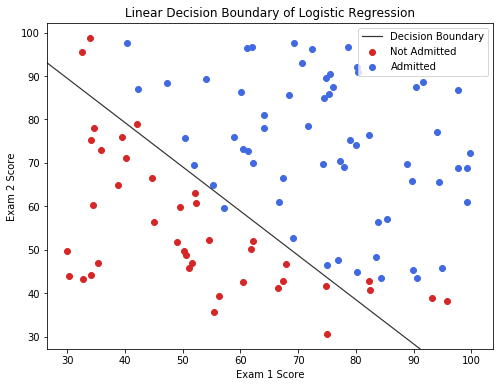

In [15]:
import pandas as pd
from matplotlib.colors import ListedColormap

cmap1 = ListedColormap(['tab:red', 'tab:blue'])

data = pd.read_csv('data/lr-data1.txt', sep=',', header=None)

na = data[data.iloc[:,2]==0]
a = data[data.iloc[:,2]==1]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(na.iloc[:,0], na.iloc[:,1], c='tab:red', label='Not Admitted')
ax.scatter(a.iloc[:,0], a.iloc[:,1], c='royalblue', label='Admitted')
ax.set(xlabel='Exam 1 Score', ylabel='Exam 2 Score')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
theta = [-557.92089817, 4.73882041, 4.64528189] # weights found from prev. notebook
x = np.arange(xmin-1, xmax+1, 0.01)
y = -((theta[1]/theta[2])*x + (theta[0]/theta[2]))
ax.plot(x, y, c='k', linewidth=1.2, alpha=0.8, label='Decision Boundary')
ax.set_title('Linear Decision Boundary of Logistic Regression')
ax.axis([xmin, xmax, ymin, ymax])
ax.legend()

In [3]:
X = data.iloc[:,:2]
y = data.iloc[:,2]

In [4]:
class LogisticRegression:
    def __init__(self, alpha=0.01, max_iter=1000000, random_state=42, poly_fit=False):
            self.alpha = alpha
            self.max_iter = max_iter
            self.random_state = random_state
            self.poly_fit = poly_fit                

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, y, h):
        h = np.clip(h, 1e-10, 1-1e-10) # h must be in (0,1) to compute log loss
        return np.sum((-y*np.log(h) - (1-y)*np.log(1-h)))/y.shape[0]
    
    def fit(self, X, y):
        if self.poly_fit == False:
            x_0 = np.ones((X.shape[0], 1)) # intercept
            X_ = np.c_[x_0, X]
        else:
            X_ = X
            print("Model fitting to polynomial features...")
            
        # random initialization of weights
        rng = np.random.RandomState(self.random_state)
        self.theta = rng.randn(X_.shape[1],1)
        y = y[:, np.newaxis]

        for i in range(self.max_iter):
            z = X_.dot(self.theta)
            h = self._sigmoid(z)
            h = np.clip(h, 1e-10, 1-1e-10)
            gradients = X_.T.dot(h-y)/y.shape[0]
            self.theta = self.theta - self.alpha*gradients
    
    def predict_proba(self, X):
        if self.poly_fit == False:
            X_ = np.c_[np.ones((X.shape[0], 1)), X]
        else:
            X_ = X
        z = X_.dot(self.theta)
        return self._sigmoid(z)
    
    def predict(self, X):
        prob = self.predict_proba(X)
        return np.where(prob > 0.5, 1, 0)
    
    def score(self, X, y):
        pred = self.predict(X)
        y = y.values.reshape(-1,1)
        return (pred == y).sum()/y.shape[0]

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_feat = poly.fit_transform(X)

In [6]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [7]:
model = LogisticRegression(alpha=0.1, max_iter=1000000, poly_fit=True)
model.fit(poly_feat,y)
acc = model.score(poly_feat,y)
print("Model Accuracy: {}".format(acc))

Model fitting to polynomial features...
Model Accuracy: 1.0


In [8]:
# for decision boundary
x_1 = np.arange(xmin, xmax, 0.1)
x_2 = np.arange(ymin, ymax, 0.1)
xx_1, xx_2 = np.meshgrid(x_1, x_2)
zz = np.c_[xx_1.ravel(), xx_2.ravel()]
poly_zz = poly.fit_transform(zz)
pred = model.predict(poly_zz)
Z = pred.reshape(xx_1.shape)

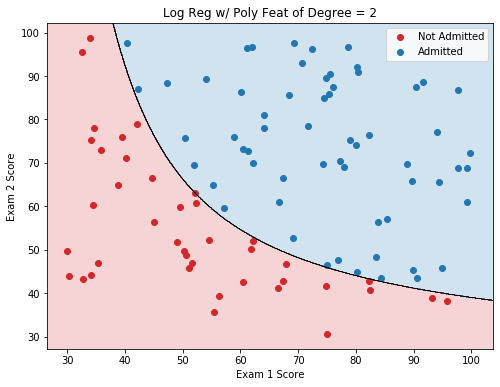

In [9]:
def plot_boundary(Z, degree=2, ax=None):
    if ax == None:
        fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(na.iloc[:,0], na.iloc[:,1], c='tab:red', label='Not Admitted')
    ax.scatter(a.iloc[:,0], a.iloc[:,1], c='tab:blue', label='Admitted')
    ax.set(xlabel='Exam 1 Score', ylabel='Exam 2 Score', 
           title='Log Reg w/ Poly Feat of Degree = {}'.format(degree))
    ax.contourf(xx_1, xx_2, Z, cmap=cmap1, alpha=0.2)
    ax.contour(xx_1, xx_2, Z, colors='k', linewidths=0.3)
    ax.axis([xmin, xmax, ymin, ymax])
    ax.legend()

plot_boundary(Z)

## Varying Degree of Polynomial Features

Model fitting to polynomial features...
Model fitting to polynomial features...
Model fitting to polynomial features...
Model fitting to polynomial features...


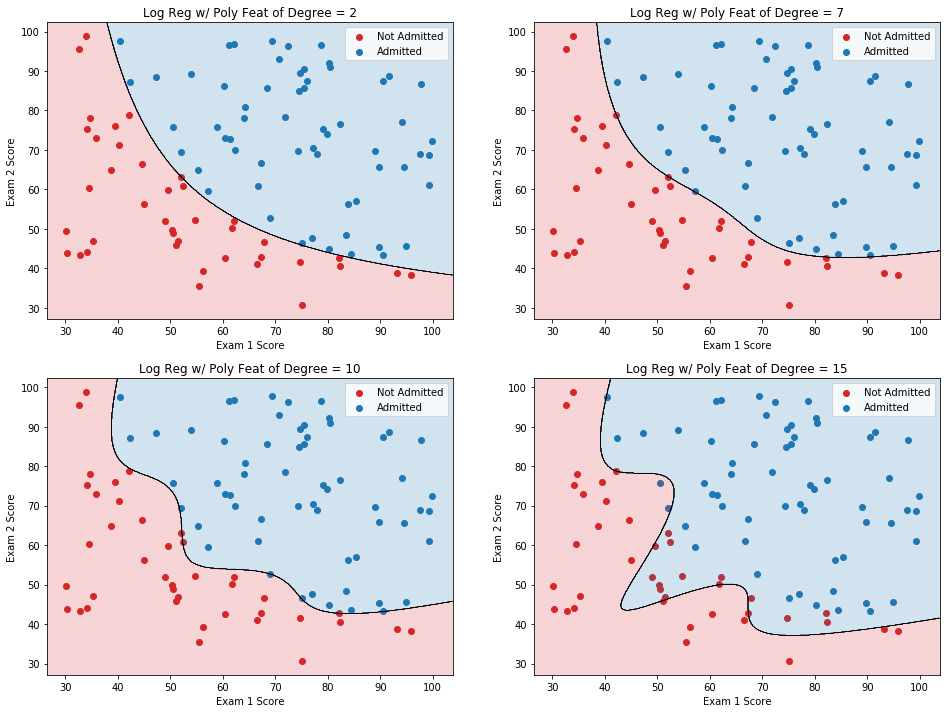

In [10]:
degrees = [2, 7, 10, 15]

fig, axes = plt.subplots(2, 2, figsize=(16,12))

for d, ax in zip(degrees, axes.flat):
    poly = PolynomialFeatures(d)
    poly_feat = poly.fit_transform(X)
    model = LogisticRegression(alpha=0.1, max_iter=1000000, poly_fit=True)
    model.fit(poly_feat,y)
    poly_zz = poly.fit_transform(zz)
    pred = model.predict(poly_zz)
    Z = pred.reshape(xx_1.shape)
    plot_boundary(Z, degree=d, ax=ax)